In [2]:
import pandas as pd
import math
import numpy as np
import datetime
import pycoingecko
import matplotlib.pyplot as plt

In [3]:
# Load daily aggregatrions file:
df = pd.read_csv('df_agg_daily_ETH_USDC.csv')

# Get df for ETH/USDC, USDC/USDT, STRK/USDC, STRK/ETH 
df_ETH_USDC  = df[df['tag']=='ETH_USDC']
df_USDC_USDT = df[df['tag']=='USDC_USDT']
df_STRK_USDC = df[df['tag']=='STRK_USDC']
df_STRK_ETH  = df[df['tag']=='STRK_ETH']

In [4]:
# Download ETH Data
coinGecko = pycoingecko.CoinGeckoAPI()  # Initialize CoinGecko API client
eth_data = coinGecko.get_coin_market_chart_by_id('ethereum', 'usd', '365days')  # Get historical price data for ETH
# keys: 'prices', 'market_caps', 'total_volumes'
_dates = [data[0] for data in eth_data['prices']] 
dates = [ datetime.datetime.fromtimestamp(date/1000) for date in _dates ] # convert unix timestamp to datetime
prices = [data[1] for data in eth_data['prices']]
# # Plot the data
# plt.plot(dates, prices)

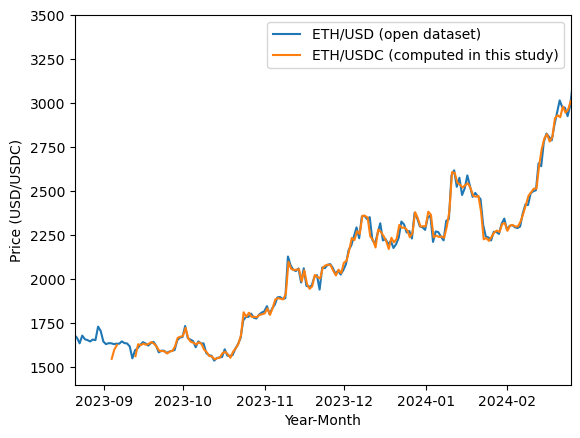

In [5]:
dfn = df_ETH_USDC
dfn['date'] = pd.to_datetime(df['date'])

plt.plot(dates, prices, label='ETH/USD (open dataset)')
plt.plot(dfn['date'], dfn['token0_daily_price_median_swap'], label='ETH/USDC (computed in this study)')
plt.xlim(dfn['date'].iloc[0], dfn['date'].iloc[-1])
plt.ylim(1400, 3500)
plt.ylabel('Price (USD/USDC)')
plt.xlabel('Year-Month')
plt.legend()

plt.savefig('images/fig_02a_01_ETH_price_comparison.png', dpi=150)

In [6]:
df_ETH_USDC.iloc[30]

tag                                               ETH_USDC
token0                                                 ETH
token1                                                USDC
date                                   2023-09-22 00:00:00
timestamp                                       1695340858
token0_daily_price_median_mint                 1603.820286
token0_daily_amount_mint                        -36.750295
token0_daily_price_median_burn                 1548.466733
token0_daily_amount_burn                          9.951053
token0_daily_amount_net_mint_burn               -26.799242
liquidity_daily_sum_mint             1184904941548403712.0
liquidity_daily_sum_burn            -1135969284770974464.0
liquidity_daily_net_mint_burn          48935656777429248.0
token0_daily_price_median_swap                 1592.688364
token0_daily_price_min_swap                     1630.04242
token0_daily_price_max_swap                    1577.918441
token0_daily_price_std_swap                       4.5336

(19590.0, 19778.0)

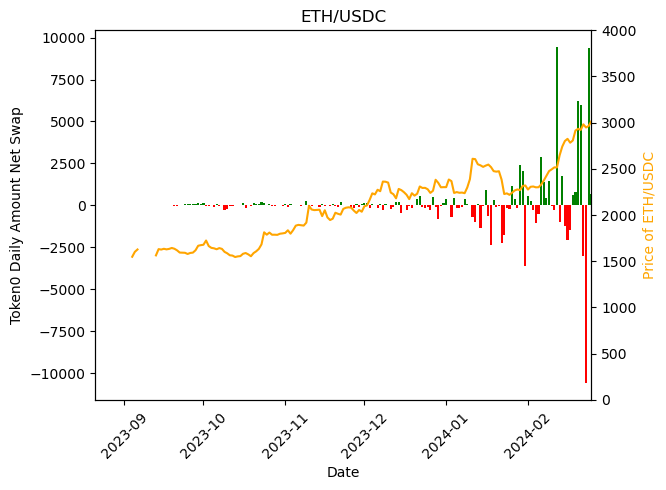

In [6]:
# ETH/USDC
dfn = df_ETH_USDC

fig, ax1 = plt.subplots()

# Define colors based on positive and negative values
colors = ['red' if val < 0 else 'green' for val in dfn['token0_daily_amount_net_swap']]

# Plot the bars
ax1.bar(dfn['date'], dfn['token0_daily_amount_net_swap'], color=colors)

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Token0 Daily Amount Net Swap')
ax1.set_title('ETH/USDC')
ax1.set_xlim(dfn.date.iloc[0], dfn.date.iloc[-1])
plt.xticks(rotation=45)


ax2 = ax1.twinx()
ax2.plot(dfn['date'], dfn['token0_daily_price_median_swap'], color='orange', label='Price of ETH/USDC')
ax2.set_ylabel('Price of ETH/USDC', color='orange')
ax2.set_ylim(-0,4000)
ax2.set_xlim(dfn.date.iloc[0], dfn.date.iloc[-1])

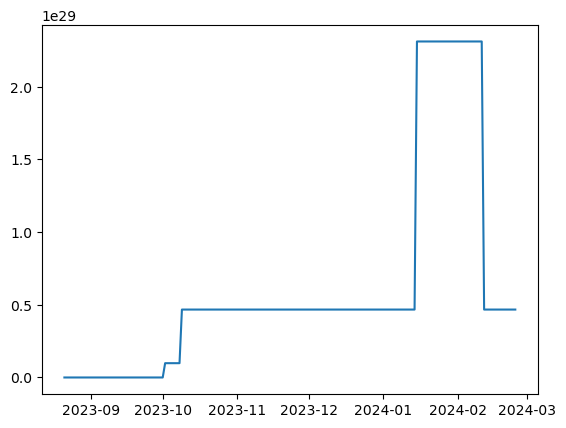

In [7]:
plt.plot(dfn['date'], dfn['liquidity_daily_net_mint_burn'].cumsum())

<BarContainer object of 30 artists>

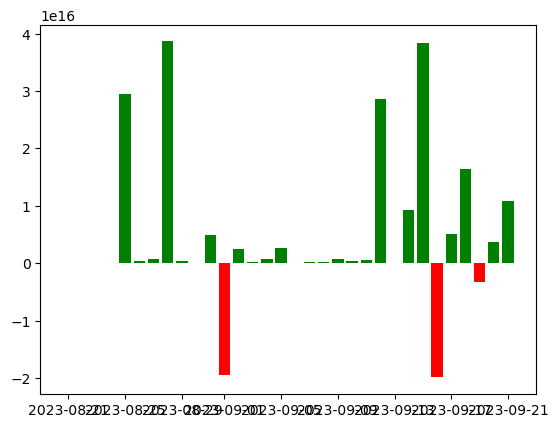

In [17]:
fig, ax1 = plt.subplots()

colors = ['red' if val < 0 else 'green' for val in dfn['liquidity_daily_net_mint_burn']]

ax1.bar(dfn['date'].iloc[:30], dfn['liquidity_daily_net_mint_burn'].iloc[:30], color=colors)


In [16]:
dfn['liquidity_daily_net_mint_burn']

0      4.865838e+13
1     -7.298758e+12
3      2.944044e+16
5      3.106993e+14
6      7.477514e+14
           ...     
383    3.311522e+14
387    3.350253e+17
392    2.998877e+17
398   -9.518769e+16
404   -1.395556e+16
Name: liquidity_daily_net_mint_burn, Length: 187, dtype: float64